In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from string import punctuation
import unidecode

In [2]:
# nltk.download("all")

In [4]:
resenha.shape

(49459, 4)

In [3]:
resenha = pd.read_csv("database-project-05.csv")
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg  
1  Este é um exemplo do motivo pelo qual a maiori...       neg  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg  
3  Nem mesmo os Beatles puderam escrever músicas ...       neg  
4  Filmes de fotos de latão não é uma palavra apr...       neg

In [4]:
treino, teste, classe_treino, classe_teste = train_test_split(resenha["text_pt"], resenha["sentiment"], random_state=42)

In [5]:
n = 5
print(f"{treino[:n]}\n\n{teste[:n]}\n\n{classe_treino[:n]}\n\n{classe_teste[:n]}")

1348     Embora o filme tenha sido apenas assim, o clos...
27466    Este é provavelmente um dos piores filmes que ...
29998    De vez em quando, um filme irá varrer ao seu r...
48186    Este é um conto completamente diabólico de quã...
26473    Lenta, chata, extremamente repetitiva. Não adm...
Name: text_pt, dtype: object

12532    Isso era incomum: um filme moderno que era ult...
35445    Alguns dos meus velhos amigos sugeriram que eu...
20279    Que prazer. Isto é realmente uma paródia. Some...
2969     Há cerca de dez minutos a meio da Strangeland,...
45161    Otelo, a clássica história de Shakespearen sob...
Name: text_pt, dtype: object

1348     neg
27466    neg
29998    neg
48186    pos
26473    neg
Name: sentiment, dtype: object

12532    pos
35445    neg
20279    pos
2969     neg
45161    pos
Name: sentiment, dtype: object


In [6]:
# regressao_logistica = LogisticRegression()
# regressao_logistica.fit(treino, classe_treino)
# acuracia = regressao_logistica.score(teste, classe_teste)

# ValueError: could not convert string to float

In [7]:
print("Negativa: \n")
print(resenha["text_pt"][189])

Negativa: 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [8]:
print("Positiva: \n")
print(resenha["text_pt"][49002])

Positiva: 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo mai

In [9]:
print(resenha["sentiment"].value_counts())

sentiment
neg    24765
pos    24694
Name: count, dtype: int64


In [10]:
classificacao = resenha["sentiment"].replace(["neg", "pos"], [0, 1])
classificacao

0        0
1        0
2        0
3        0
4        0
        ..
49454    1
49455    1
49456    1
49457    1
49458    1
Name: sentiment, Length: 49459, dtype: int64

In [11]:
resenha["classificacao"] = classificacao
resenha

id                                            text_en  \
0          1  Once again Mr. Costner has dragged out a movie...   
1          2  This is an example of why the majority of acti...   
2          3  First of all I hate those moronic rappers, who...   
3          4  Not even the Beatles could write songs everyon...   
4          5  Brass pictures movies is not a fitting word fo...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
0      Mais uma vez, o Sr. Costner arrumou um filme p...       neg   
1      Este é um exemplo do motivo pelo qual a maiori...       neg   
2      Primeiro de tudo eu odeio esses raps imbecis, ...       neg   
3      Nem mesmo os Beatles puderam escrever músicas ...       neg   
4      Filmes de fotos de latão não é uma palavra apr...       neg   
...                                                  ...       ...   
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classificacao  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
49454              1  
49455              1  
49456              1  
49457              1  
49458              1  

[49459 rows x 5 columns]

In [12]:
texto = ["Assisti um filme ótitmo", "Assisti um filme ruim"]

vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [13]:
vetorizar.get_feature_names_out()

array(['Assisti', 'filme', 'ruim', 'um', 'ótitmo'], dtype=object)

In [14]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())
matriz_esparsa

Assisti  filme  ruim  um  ótitmo
0        1      1     0   1       1
1        1      1     1   1       0

In [15]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenha["text_pt"])
bag_of_words.shape

(49459, 50)

In [16]:
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, resenha["classificacao"], random_state=42)

regressao_logistica = LogisticRegression(solver="lbfgs")
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
print(f"Acurácia: {acuracia*100:.2f}%")

Acurácia: 65.83%


In [17]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])

    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, texto[coluna_classificacao], random_state=42)

    regressao_logistica = LogisticRegression(solver="lbfgs")
    regressao_logistica.fit(treino, classe_treino)
    score = regressao_logistica.score(teste, classe_teste)
    print(f"Acurácia: {score*100:.2f}%")

classificar_texto(resenha, "text_pt", "classificacao")

Acurácia: 65.83%


In [18]:
todas_as_palavras = " ".join([texto for texto in resenha["text_pt"]])
len(todas_as_palavras)

63448424

In [19]:
nuvem_de_palavras = WordCloud().generate(todas_as_palavras)

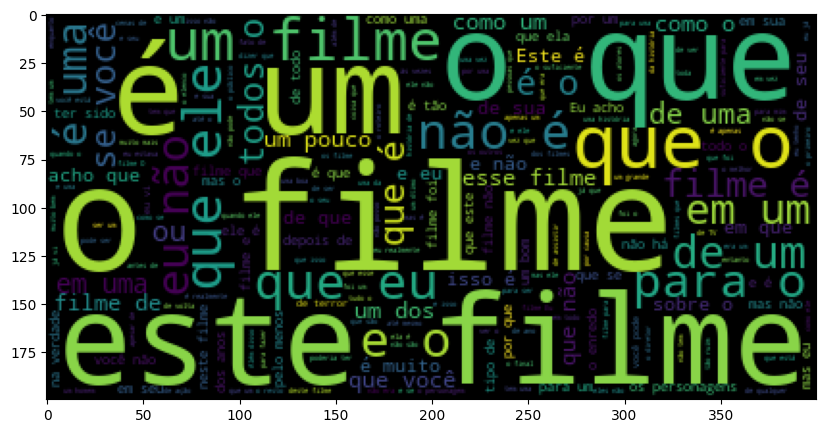

In [20]:
plt.figure(figsize=(15,5))
plt.imshow(nuvem_de_palavras)
plt.show()

In [21]:
nuvem_de_palavras = WordCloud(width=1000, height=500, max_font_size=110).generate(todas_as_palavras)

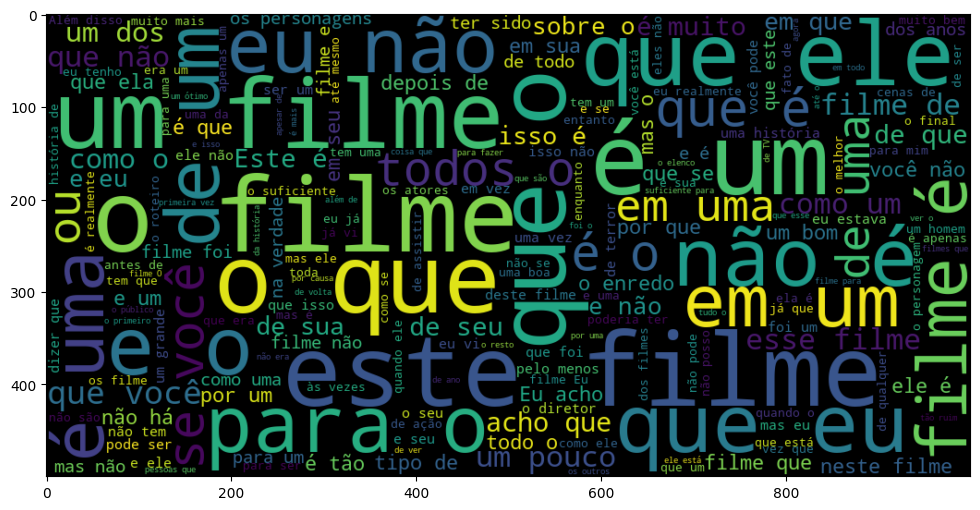

In [22]:
plt.figure(figsize=(14,6))
plt.imshow(nuvem_de_palavras, interpolation="bilinear")
plt.show()

In [23]:
nuvem_de_palavras = WordCloud(width=1000, height=500, max_font_size=110, collocations=False).generate(todas_as_palavras)

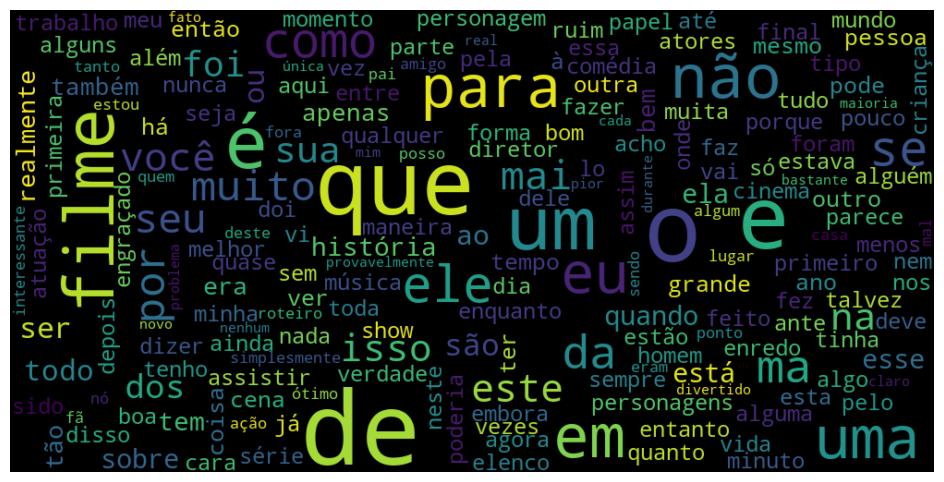

In [24]:
plt.figure(figsize=(14,6))
plt.imshow(nuvem_de_palavras, interpolation="bilinear")
plt.axis("off")
plt.show()

In [25]:
resenha.query("sentiment == 'pos'")

id                                            text_en  \
12389  12391  I went and saw this movie last night after bei...   
12390  12392  Actor turned director Bill Paxton follows up h...   
12391  12393  As a recreational golfer with some knowledge o...   
12392  12394  I saw this film in a sneak preview, and it is ...   
12393  12395  Bill Paxton has taken the true story of the 19...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
12389  Eu fui e vi este filme ontem à noite depois de...       pos   
12390  O diretor do ator, Bill Paxton, segue sua prom...       pos   
12391  Como um jogador de recreio com algum conhecime...       pos   
12392  Eu vi esse filme em uma prévia, e é delicioso....       pos   
12393  Bill Paxton levou a verdadeira história do gol...       pos   
...                                                  ...       ...   
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classificacao  
12389              1  
12390              1  
12391              1  
12392              1  
12393              1  
...              ...  
49454              1  
49455              1  
49456              1  
49457              1  
49458              1  

[24694 rows x 5 columns]

In [26]:
def nuvem_de_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query("sentiment == 'neg'")
    todas_as_palavras = " ".join([texto for texto in texto_negativo[coluna_texto]])
    nuvem_de_palavras = WordCloud(width=1000, height=500, max_font_size=110, collocations=False).generate(todas_as_palavras)
    plt.figure(figsize=(14,6))
    plt.imshow(nuvem_de_palavras, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [27]:
def nuvem_de_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query("sentiment == 'pos'")
    todas_as_palavras = " ".join([texto for texto in texto_positivo[coluna_texto]])
    nuvem_de_palavras = WordCloud(width=1000, height=500, max_font_size=110, collocations=False).generate(todas_as_palavras)
    plt.figure(figsize=(14,6))
    plt.imshow(nuvem_de_palavras, interpolation="bilinear")
    plt.axis("off")
    plt.show()

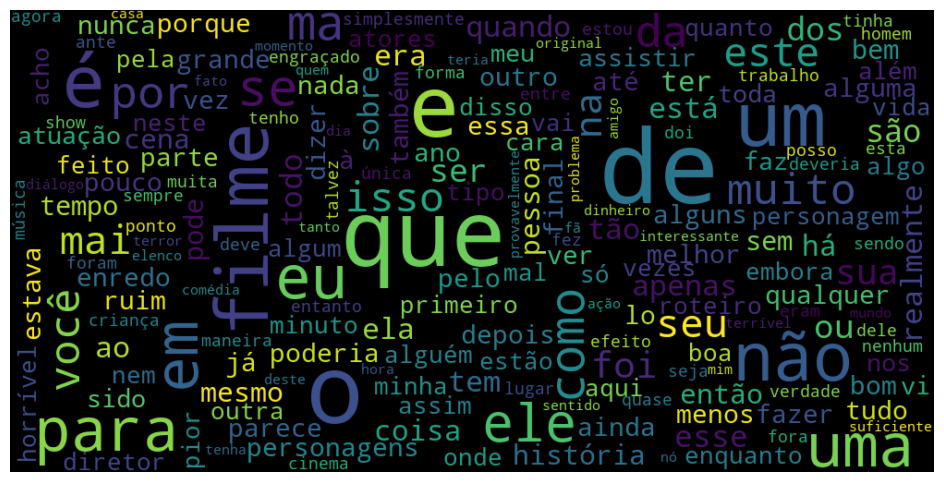

In [28]:
nuvem_de_palavras_neg(resenha, "text_pt")

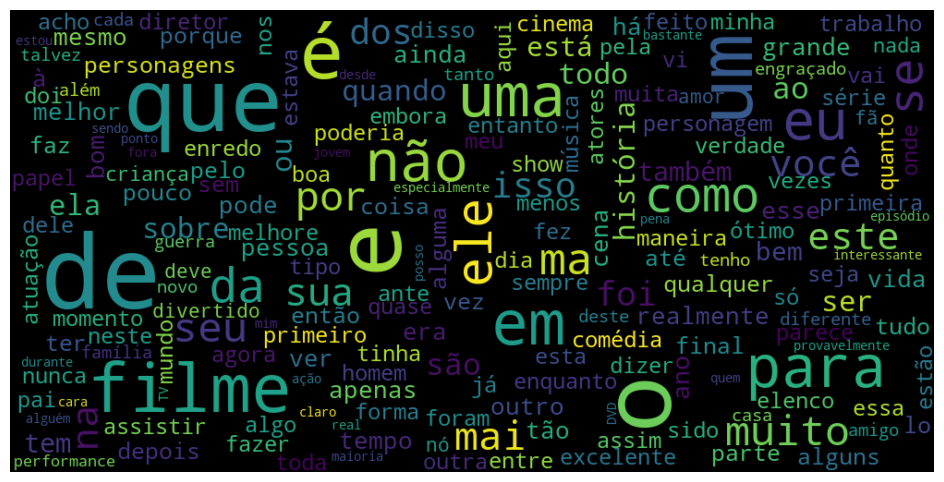

In [29]:
nuvem_de_palavras_pos(resenha, "text_pt")

In [30]:
frase = ["um filme ruim", "um filme bom"]
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'um filme ruim': 1, 'um filme bom': 1})

In [31]:
frase = "Boca eliminou o Palmeiras nos penaltis"
token_espaco = nltk.tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
token_frase

['Boca', 'eliminou', 'o', 'Palmeiras', 'nos', 'penaltis']

In [32]:
frequencia = nltk.FreqDist(token_frase)
frequencia

FreqDist({'Boca': 1, 'eliminou': 1, 'o': 1, 'Palmeiras': 1, 'nos': 1, 'penaltis': 1})

In [33]:
token_espaco = nltk.tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(todas_as_palavras)
frequencia = nltk.FreqDist(token_frase)

In [34]:
frequencia

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [35]:
df_frequencia = pd.DataFrame({"palavra": list(frequencia.keys()),
                             "frequencia": list(frequencia.values())})
df_frequencia

palavra  frequencia
0             Mais        1538
1              uma      130888
2             vez,        1927
3                o      244881
4              Sr.        1741
...            ...         ...
348280  Muppified,           1
348281   inventora           1
348282      "Union           1
348283      beirar           1
348284    rosados.           1

[348285 rows x 2 columns]

In [36]:
df_frequencia.sort_values("frequencia", ascending=False).head(10)

palavra  frequencia
20       de      417651
14      que      325070
42        e      299743
3         o      244881
7        um      216410
102       a      210179
45        é      192381
200      em      132778
1       uma      130888
29      não      127915

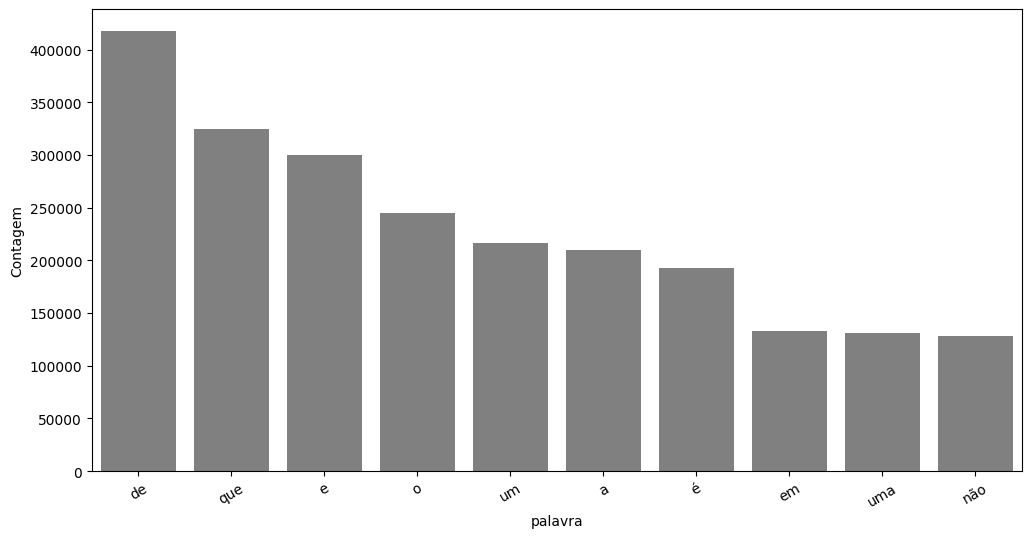

In [37]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df_frequencia.sort_values("frequencia", ascending=False).head(10), x="palavra", y="frequencia", color="gray")
ax.set(ylabel = "Contagem")
plt.xticks(rotation=30)
plt.show()

In [38]:
def pareto(texto, coluna_texto, top_n):
    todas_as_palavras = " ".join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_as_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"palavra": list(frequencia.keys()),
                                "frequencia": list(frequencia.values())})
    df_frequencia_top_n = df_frequencia.sort_values("frequencia", ascending=False).head(top_n)
    plt.figure(figsize=(12,6))
    ax = sns.barplot(data=df_frequencia_top_n, x="palavra", y="frequencia", color="gray")
    ax.set(ylabel = "Contagem")
    plt.xticks(rotation=45)
    plt.show()

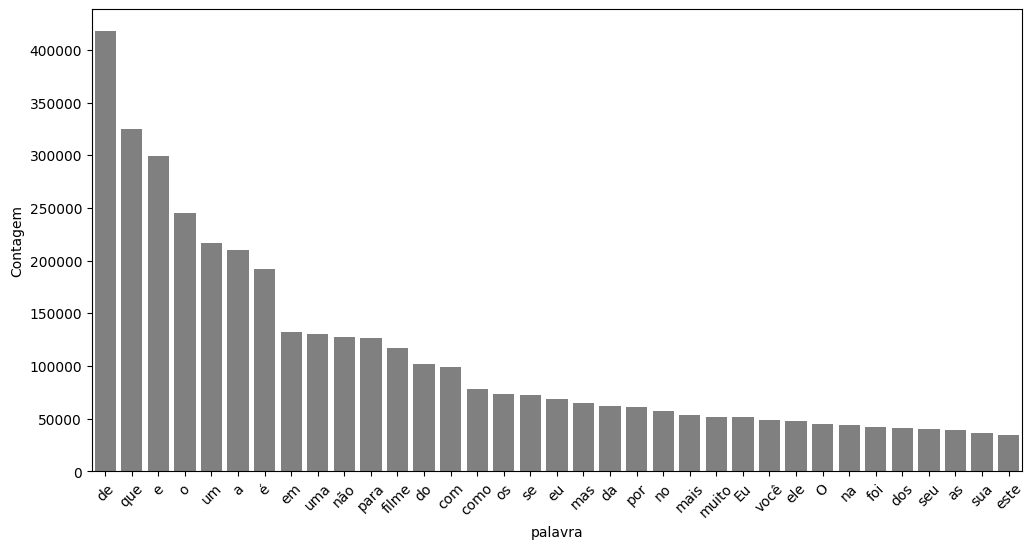

In [39]:
pareto(resenha, "text_pt", 35)

In [40]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
print(palavras_irrelevantes)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [41]:
frase_processada = list()
for opiniao in resenha["text_pt"]:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(" ".join(nova_frase))

resenha["tratamento_1"] = frase_processada

In [42]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                        tratamento_1  
0  Mais vez, Sr. Costner arrumou filme tempo nece...  
1  Este exemplo motivo maioria filmes ação mesmos...  
2  Primeiro tudo odeio raps imbecis, poderiam agi...  
3  Nem Beatles puderam escrever músicas todos gos...  
4  Filmes fotos latão palavra apropriada eles, ve...

In [43]:
classificar_texto(resenha, "tratamento_1", "classificacao")

Acurácia: 68.11%


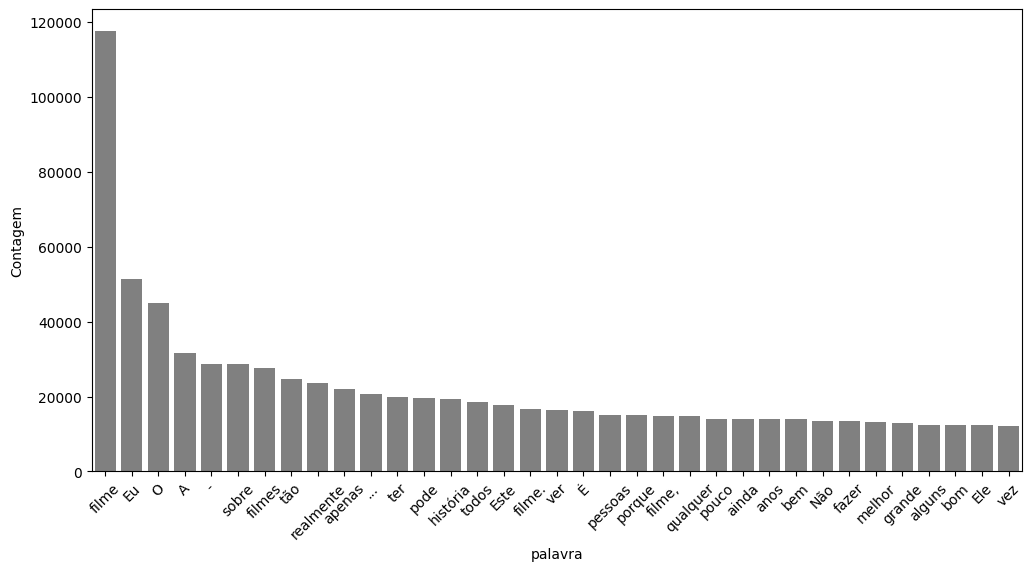

In [44]:
pareto(resenha, "tratamento_1", 35)

In [45]:
frase = "Boca eliminou o Palmeiras nos penaltis!"
token_pontuacao = nltk.tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
token_frase

['Boca', 'eliminou', 'o', 'Palmeiras', 'nos', 'penaltis', '!']

In [46]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

pontuacao


['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [48]:
pontuacao_stop_words = pontuacao + palavras_irrelevantes

frase_processada = list()
for opiniao in resenha["tratamento_1"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stop_words:
            nova_frase.append(palavra)
    frase_processada.append(" ".join(nova_frase))

resenha["tratamento_2"] = frase_processada

In [49]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                        tratamento_1  \
0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis, poderiam agi...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada eles, ve...   

                                        tratamento_2  
0  Mais vez Sr Costner arrumou filme tempo necess...  
1  Este exemplo motivo maioria filmes ação mesmos...  
2  Primeiro tudo odeio raps imbecis poderiam agir...  
3  Nem Beatles puderam escrever músicas todos gos...  
4  Filmes fotos latão palavra apropriada verdade ...

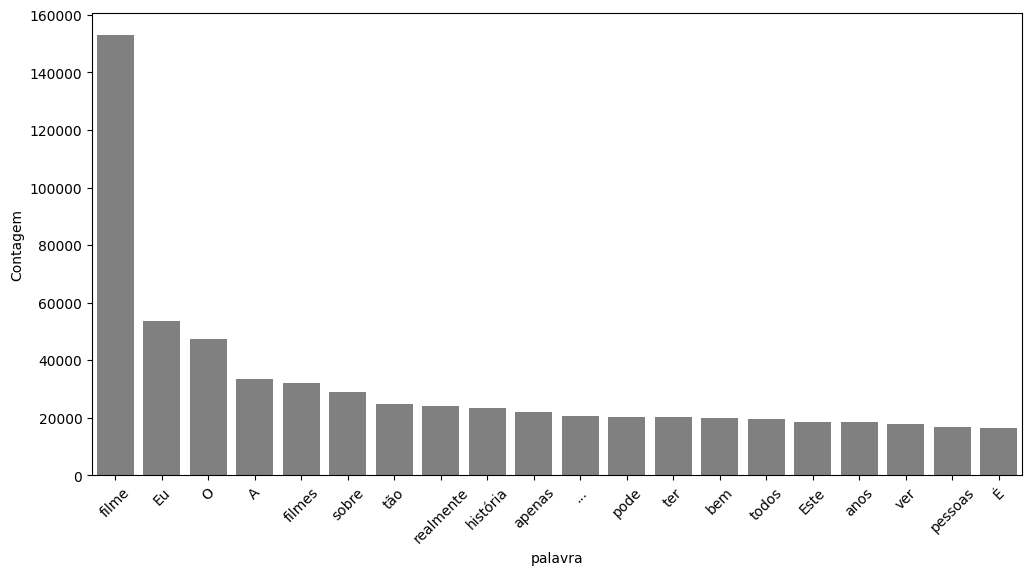

In [50]:
pareto(resenha, "tratamento_2", 20)

In [51]:
palavras_acentos_exemplo = "é não ótimo à péssimo você"
palavras_acentos_exemplo = unidecode.unidecode(palavras_acentos_exemplo)
palavras_acentos_exemplo

'e nao otimo a pessimo voce'

In [52]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha["tratamento_2"]]

In [53]:
sem_acentos[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [54]:
stop_words_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stop_words]
stop_words_sem_acento

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'a',
 'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'as',
 'ate',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'eramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'esta',
 'estamos',
 'estao',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estavamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiveramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivessemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'foramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fossemos',
 'fui',
 'ha',
 'haja

In [55]:
resenha["tratamento_3"] = sem_acentos

In [56]:
frase_processada = list()
for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stop_words_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(" ".join(nova_frase))

resenha["tratamento_3"] = frase_processada

In [57]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                        tratamento_1  \
0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis, poderiam agi...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada eles, ve...   

                                        tratamento_2  \
0  Mais vez Sr Costner arrumou filme tempo necess...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis poderiam agir...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada verdade ...   

                                        tratamento_3  
0  Mais vez Sr Costner arrumou filme tempo necess...  
1  Este exemplo motivo maioria filmes acao mesmos...  
2  Primeiro tudo odeio raps imbecis poderiam agir...  
3  Nem Beatles puderam escrever musicas todos gos...  
4  Filmes fotos latao palavra apropriada verdade ...

In [58]:
acuracia_tratamento3 = classificar_texto(resenha, "tratamento_3", "classificacao")

Acurácia: 68.88%


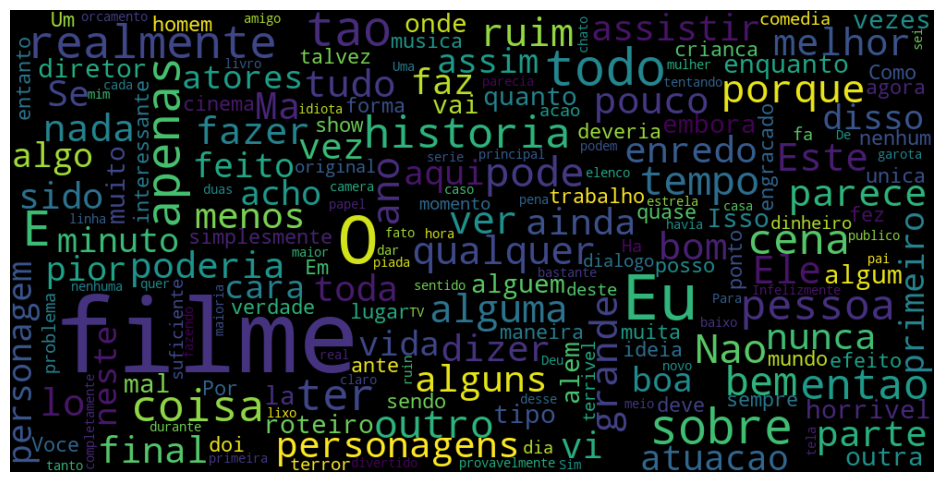

In [59]:
nuvem_de_palavras_neg(resenha, "tratamento_3")

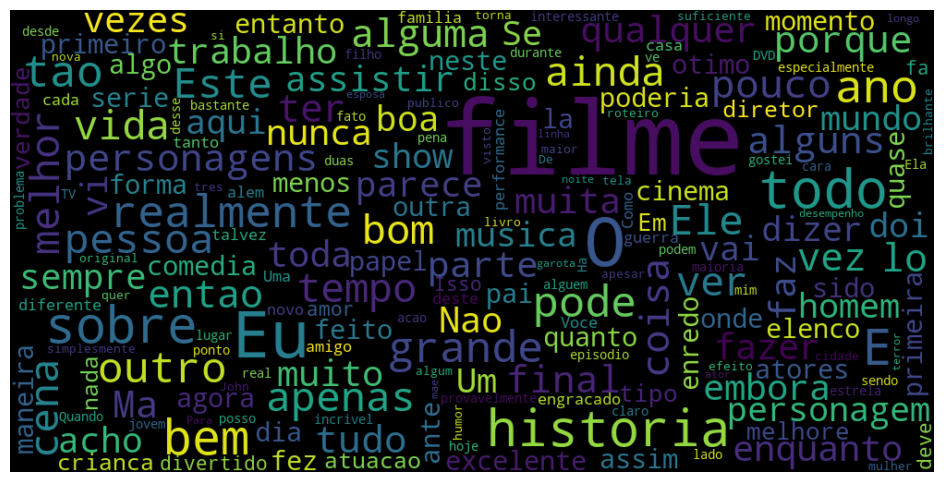

In [60]:
nuvem_de_palavras_pos(resenha, "tratamento_3")

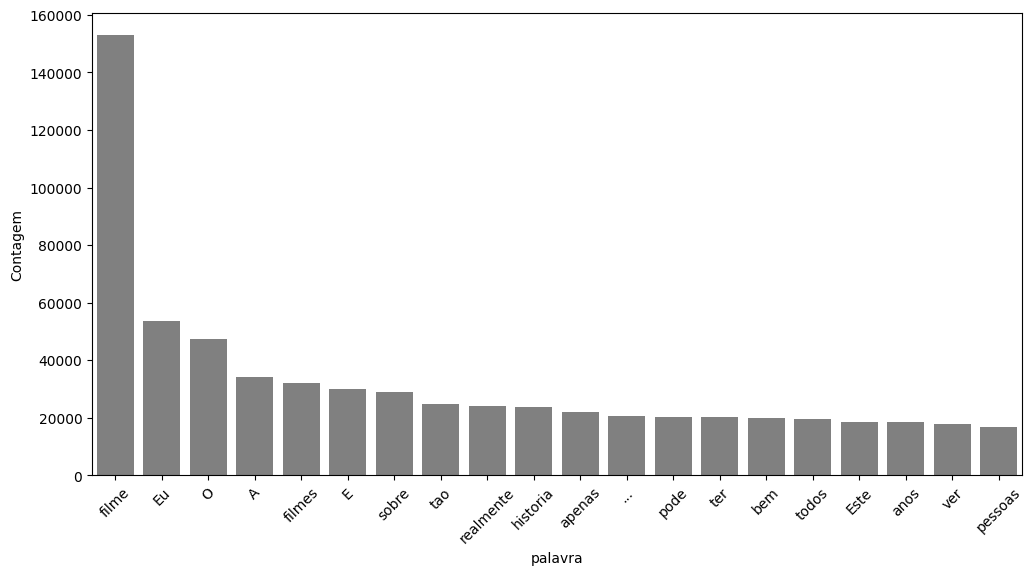

In [61]:
pareto(resenha, "tratamento_3", 20)

In [63]:
frase = "O Boca eliminou o Palmeiras nos penaltis!"
print(frase.lower())

o boca eliminou o palmeiras nos penaltis!


In [64]:
frase_processada = list()
for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stop_words_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(" ".join(nova_frase))

resenha["tratamento_4"] = frase_processada

In [65]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                        tratamento_1  \
0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis, poderiam agi...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada eles, ve...   

                                        tratamento_2  \
0  Mais vez Sr Costner arrumou filme tempo necess...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis poderiam agir...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada verdade ...   

                                        tratamento_3  \
0  Mais vez Sr Costner arrumou filme tempo necess...   
1  Este exemplo motivo maioria filmes acao mesmos...   
2  Primeiro tudo odeio raps imbecis poderiam agir...   
3  Nem Beatles puderam escrever musicas todos gos...   
4  Filmes fotos latao palavra apropriada verdade ...   

                                        tratamento_4  
0  vez sr costner arrumou filme tempo necessario ...  
1  exemplo motivo maioria filmes acao mesmos gene...  
2  primeiro tudo odeio raps imbecis poderiam agir...  
3  beatles puderam escrever musicas todos gostass...  
4  filmes fotos latao palavra apropriada verdade ...

In [66]:
acuracia_tratamento4 = classificar_texto(resenha, "tratamento_4", "classificacao")

Acurácia: 68.74%


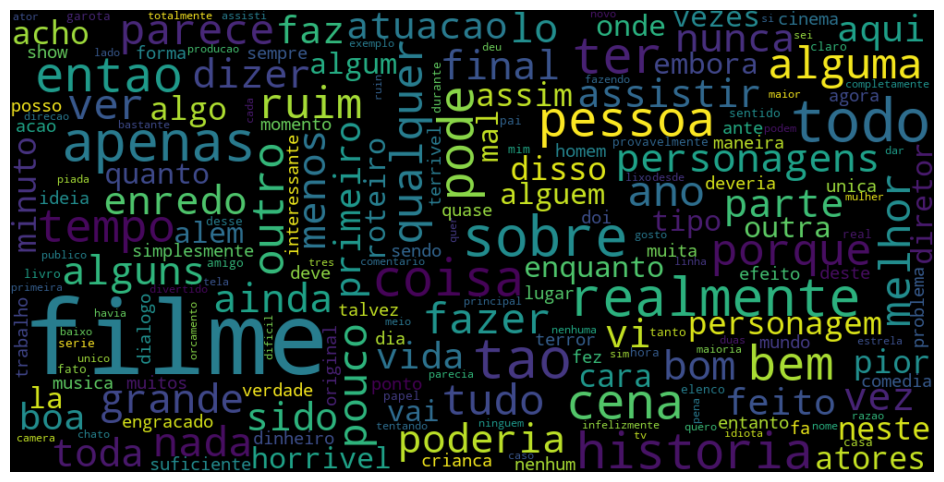

In [67]:
nuvem_de_palavras_neg(resenha, "tratamento_4")

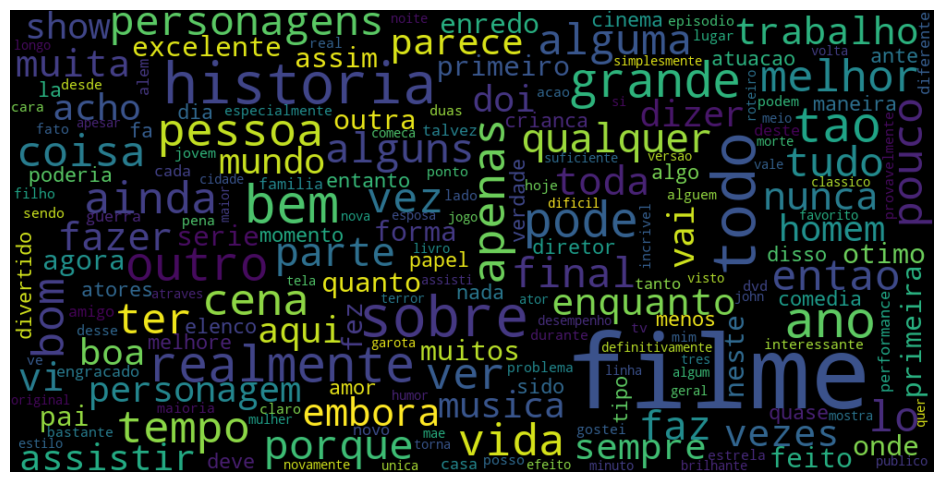

In [68]:
nuvem_de_palavras_pos(resenha, "tratamento_4")

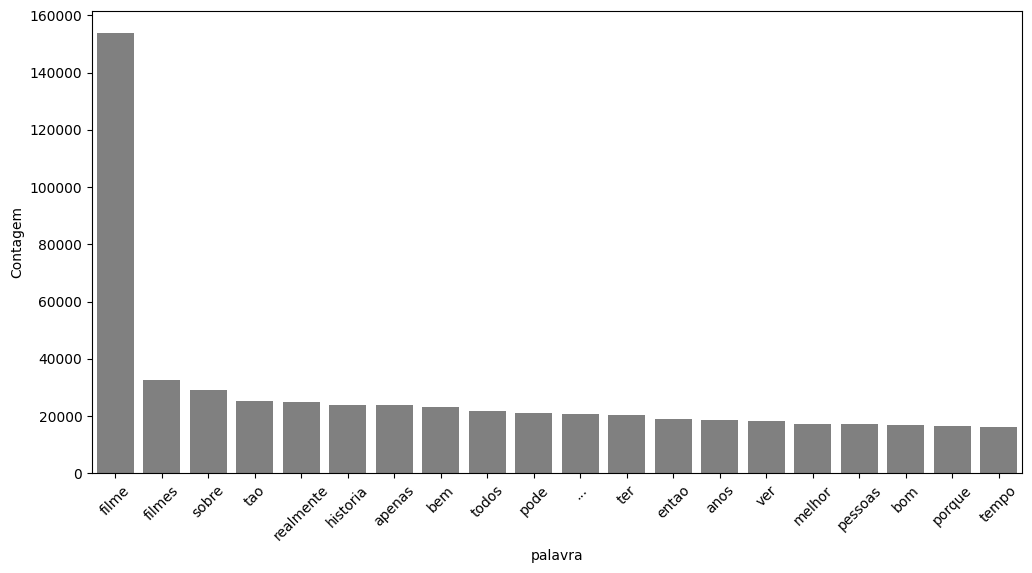

In [70]:
pareto(resenha, "tratamento_4", 20)

In [74]:
stemmer = nltk.RSLPStemmer()
print(stemmer.stem("correr"))
print(stemmer.stem("corrida"))
print(stemmer.stem("correria"))

corr
corr
corr


In [76]:
frase_processada = list()
for opiniao in resenha["tratamento_4"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(" ".join(nova_frase))

resenha["tratamento_5"] = frase_processada

In [77]:
acuracia_tratamento5 = classificar_texto(resenha, "tratamento_5", "classificacao")

Acurácia: 69.54%


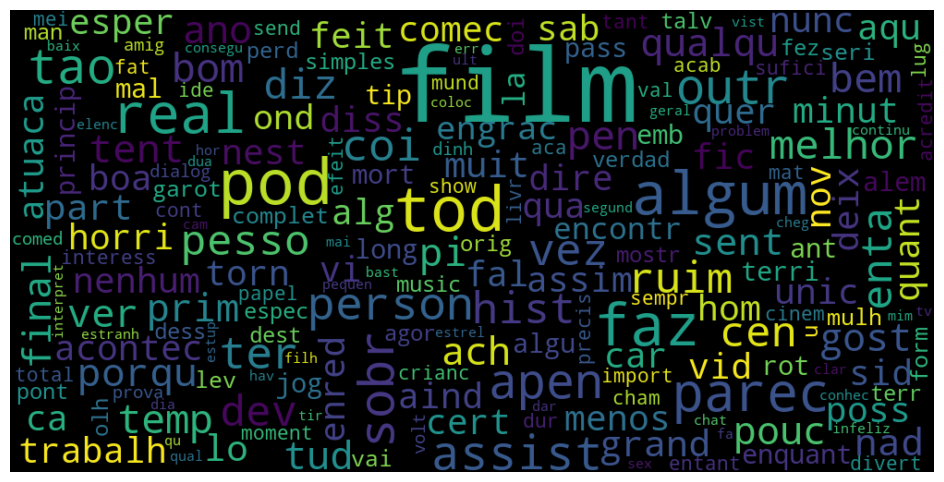

In [78]:
nuvem_de_palavras_neg(resenha, "tratamento_5")

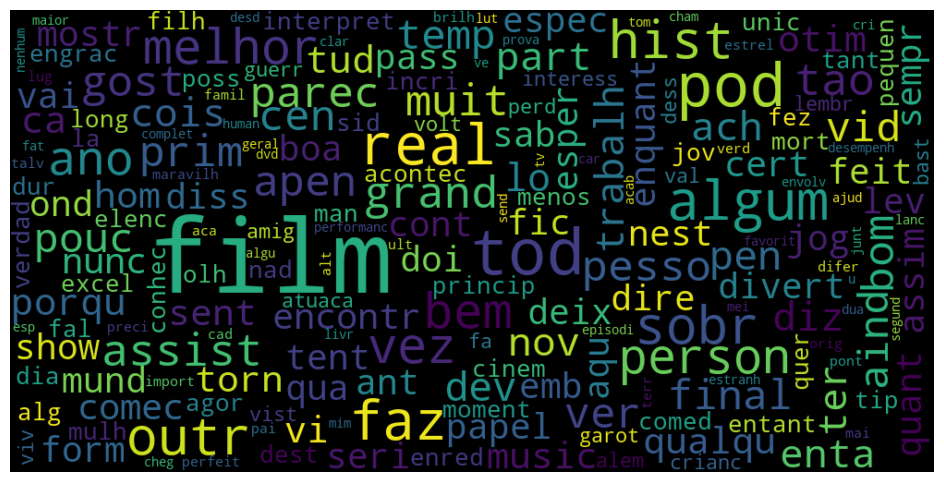

In [79]:
nuvem_de_palavras_pos(resenha, "tratamento_5")

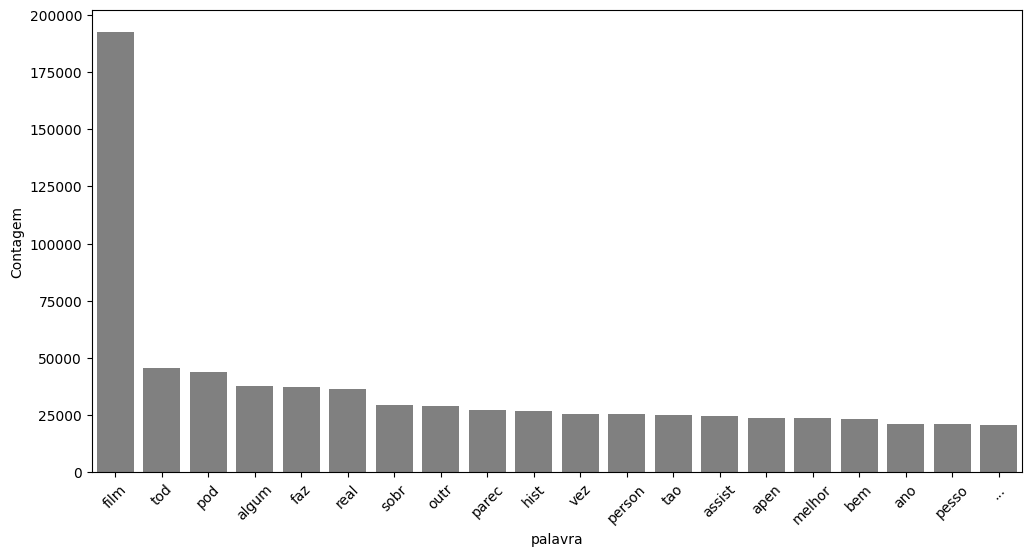

In [80]:
pareto(resenha, "tratamento_5", 20)

In [84]:
frases = ["Assisti um filme ótimo", "Assisti um filme péssimo"]

tfidf = TfidfVectorizer(lowercase=False, max_features=50)

caracterisiticas = tfidf.fit_transform(frases)

pd.DataFrame(
    caracterisiticas.todense(),
    columns= tfidf.get_feature_names_out()
)

Assisti     filme   péssimo        um     ótimo
0  0.448321  0.448321  0.000000  0.448321  0.630099
1  0.448321  0.448321  0.630099  0.448321  0.000000

In [86]:
tfidf_bruto = tfidf.fit_transform(resenha["text_pt"])

treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto, resenha["classificacao"], random_state=42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao_logistica.score(teste, classe_teste)
print(f"Acurácia do TFIDF bruto é de {acuracia_tfidf_bruto*100:.2f}%")

Acurácia do TFIDF bruto é de 66.01%


In [87]:
tfidf_tratados = tfidf.fit_transform(resenha["tratamento_5"])

treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados, resenha["classificacao"], random_state=42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_tratados = regressao_logistica.score(teste, classe_teste)
print(f"Acurácia do TFIDF tratado é de {acuracia_tfidf_tratados*100:.2f}%")

Acurácia do TFIDF tratado é de 69.63%


In [91]:
frase  = "O Boca eliminou o Palmeiras nos penaltis!"

frase_separada = token_espaco.tokenize(frase)
pares = nltk.ngrams(frase_separada, 2)
list(pares)

[('O', 'Boca'),
 ('Boca', 'eliminou'),
 ('eliminou', 'o'),
 ('o', 'Palmeiras'),
 ('Palmeiras', 'nos'),
 ('nos', 'penaltis!')]

In [93]:
# tfidf sem ngrams e sem max_features:

tfidf = TfidfVectorizer(lowercase=False,)
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, resenha["classificacao"], random_state=42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf = regressao_logistica.score(teste, classe_teste)
print(f"Acurácia sem ngrams é de {acuracia_tfidf*100:.2f}%")

Acurácia sem ngrams é de 88.48%


In [102]:
# tfidf com ngrams e sem max_features:

tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1, 2))
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, resenha["classificacao"], random_state=42)

regressao_logistica.fit(treino, classe_treino)
acuracia_ngrams = regressao_logistica.score(teste, classe_teste)
print(f"Acurácia com ngrams é de {acuracia_ngrams*100:.2f}%")


Acurácia com ngrams é de 88.56%


In [108]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index=tfidf.get_feature_names_out(),
)

In [109]:
display(pesos.nlargest(10,0), pesos.nsmallest(10,0))

0
otim      9.905861
excel     9.008890
perfeit   6.899348
maravilh  6.287748
favorit   5.890854
incri     5.762413
divert    5.386765
brilh     4.857927
ador      4.575856
hoj       4.492844

0
ruim   -11.783101
pi     -11.462566
horri   -9.725877
terri   -8.404179
nad     -7.623785
chat    -7.517419
parec   -6.881806
nenhum  -6.380778
tent    -5.955765
mal     -5.712541